In [15]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK, Roots;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
3e21 * 0.001, # Doping states' density (cm^-3)
0.29 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-0.62, # Fermi level (J)
0.1, # Intrinsic semiconductor's gaussian width (J)
0.1, # Doping states' gaussian width (J)
);

F = -5.3e4; # Field (V.cm^-1)
T = 300;

In [16]:
ratio = [0.001 * 5i for i in 0:1:15];
charge = [];

p() = quadgk(
    r -> Conduction.DOS(semiconductor, r, T) * Conduction.F(semiconductor, r, T) * Conduction.k * T,
    -Inf,
    Inf
)[1];

In [17]:
res = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(charge, p())
    append!(res, Conduction.overallDiffusion(semiconductor, T, F, 15));
end


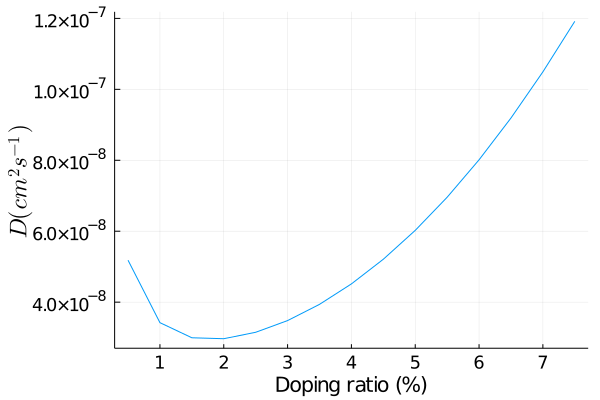

In [57]:
plot(ratio[2:end] .* 100, res[2:end], xlabel="Doping ratio (%)", ylabel=L"D(cm^2 s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [27]:
res_mobi = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(res_mobi, Conduction.overallMobility(semiconductor, T, F, 15));
end

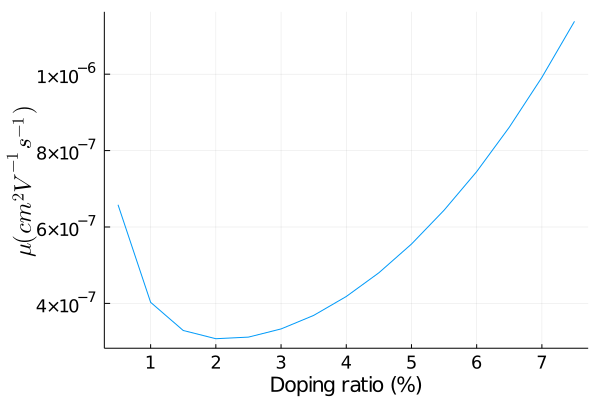

In [58]:
plot(ratio[2:end] .* 100, res_mobi[2:end], xlabel="Doping ratio (%)", ylabel=L"\mu(cm^2 V^{-1}s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [33]:
res_ein = [];

for i in ratio
    semiconductor.Nd = semiconductor.Ni * i;
    append!(res_ein, Conduction.overallEin(semiconductor, T, F, 15));
end

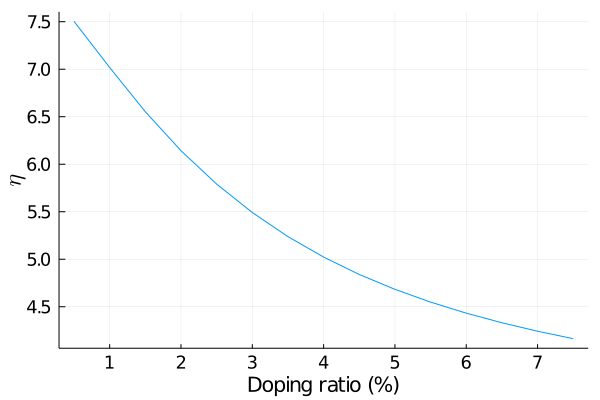

In [59]:
plot(ratio[2:end] .* 100, res_ein[2:end] / (Conduction.k * T / Conduction.q),  xlabel="Doping ratio (%)", ylabel=L"\eta", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [41]:
function quantityCarrier(x)
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    return p()
end

density

function find_multiple_zeros(x)
    density = (r -> find_zero(x -> quantityCarrier(x) - r, 1e20)).(range)
    return density
end
range = [i for i in 1:9] .* 10^18;
densities = find_multiple_zeros(range)

9-element Array{Float64,1}:
 6.303756287759372e23
 1.2607512575518748e24
 1.891126886327812e24
 2.521502515103749e24
 3.1518781438796873e24
 3.782253772655624e24
 4.412629401431562e24
 5.043005030207498e24
 5.673380658983437e24

In [47]:
res_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_2, Conduction.overallDiffusion(semiconductor, T, F, 15));
end

In [48]:
res_mobi_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_mobi_2, Conduction.overallMobility(semiconductor, T, F, 15));
end

In [49]:
res_ein_2 = [];

for x in densities
    semiconductor.Ni = x;
    semiconductor.Nd = 0.001 * x;
    append!(res_ein_2, Conduction.overallEin(semiconductor, T, F, 15));
end

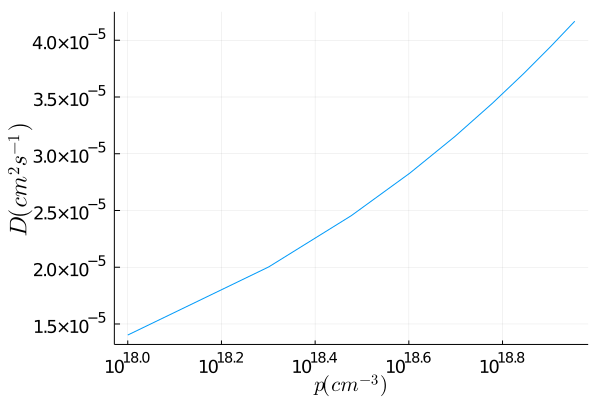

In [63]:
plot(range, res_2, xlabel=L"p (cm^{-3})", ylabel=L"D(cm^2 s^{-1})", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

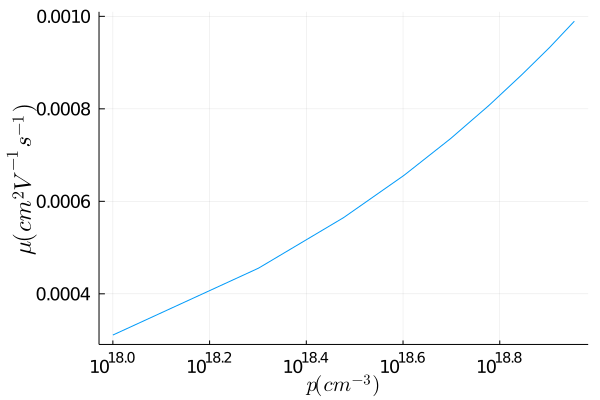

In [64]:
plot(range, res_mobi_2, xlabel=L"p (cm^{-3})", ylabel=L"\mu(cm^2 V^{-1}s^{-1})", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)


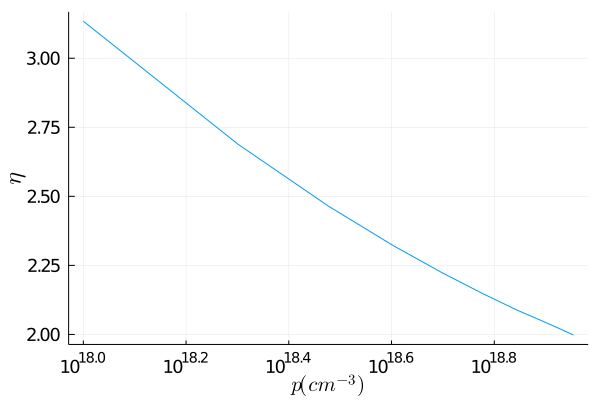

In [66]:
plot(range, res_ein_2 ./ (Conduction.k * T / Conduction.q), xlabel=L"p (cm^{-3})", ylabel=L"\eta", xaxis=:log, label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)
